## **Heart Attack analysis** 

Notebook description
Write about hypothesis, methods, stuff, contribution, data

# Importing Data and Modules

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [4]:
import io

df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
# Dataset is now stored in a Pandas Dataframe

# Explorig data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().values.any()
#No Nan Values

False

In [ ]:
df.rename(columns={'cp':'chest_pain','trtbps': 'resting_BP','chol':'cholesterol', 'fbs':'fasting_BS', 'restecg':'resting_ECG', 'thalachh': 'max_heart_rate', 'slp': 'ST_slope', 'output':'HA_pred' },inplace=True)

In [ ]:
#0 Age 
#1 Sex 
#2 Chest pain 1-4
#3 resting_bp
#4 cholesterol
#5 fasting_bs 
#6 resting_ecg_result  
#7 max_heart_rate
#8 exang 
#9 oldpeak (bit tricky)
#10 st_slope 
#11 caa // include description somewhere corona artery anomalities
#12 thal // thalassemia
#13 HA_pred // Heart attack prediction

df.columns

Index(['age', 'sex', 'chest_pain', 'resting_BP', 'cholesterol', 'fasting_BS',
       'resting_ECG', 'max_heart_rate', 'exng', 'oldpeak', 'ST_slope', 'caa',
       'thall', 'HA_pred'],
      dtype='object')

# *Explain variable values*

In [ ]:
df.head()
# H > 240 critical value 
# FBS = 1 -> diabetes (126 or more)
# caa num major heart vessels blocked (4)? corona_artery_anomalities 


,age,sex,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_heart_rate,exng,oldpeak,ST_slope,caa,thall,HA_pred
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#      Variables

 age 
 * age of patient

---

 sex

*    conditions:

 * 0: female

 * 1: male
 
---
 chest_pain (chest pain type)

*  conditions:

 * 0: typical angina 

 *  1: atypical angina

 * 2: non-anginal pain

 * 3: asymptomatic



---

 resting_BP (resting blood pressure)			
*    in mm Hg 
*   measured on admission to hospital
*    normally: 120/80
  

---

 cholesterol 
*    mg/dl
*    200-239 is considered borderline high
*    value >240 is too high

---

 fasting_BS (fasting blood sugar)
*    120 mg/dl
*    conditions:
	*  1: > 120 mg/dl
	*  0: <= 120 mg/dl
*    normal: ~100

---

 resting_ECG (resting electrocardiographic results)
*    conditions:
	*  0: normal
	*  1: ST-T 
	*  2: hypertrophy 

---

 max_heart_rate (maximum heart rate achieved)
*    normal: 72

---

 exng (exercise induced angina)
*    conditions:
	*  1: true
	*  0: false

---

 oldpeak:
*    ST depression induced by exercise relative to rest
---

 ST_slope:
*    slope of peak exercise ST segment
ST_slope:
*    slope of peak exercise ST segment
*    conditions:
	*  0: upsloping
	*  1: flat
	*  2: downsloping

---

 caa (number of major vessels (index or nr?)):
*    range:
	*    0 - 4

---

 thall (thallamaesia)
*    conditions:
	*  1: normal
	*  2: fixed defect
	*  3: reversable defect
---

 HA_pred (chance of heart attack)
*    conditions:
	*  0: less chance of heart attack
	*  1: more chance of heart attack


# *Do some stat methods here*

In [ ]:
df.head()#Erase after work

,age,sex,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_heart_rate,exng,oldpeak,ST_slope,caa,thall,HA_pred
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Calc mean, sd, median for age, resting_BP, fasting_BS, max_HR

In [ ]:
#Calculate the number of female and male subjects
display(df.sex.value_counts())


#Calculate the mean of the cholesteral grouped by sex 
df_1 = df.groupby('sex', as_index=False)['cholesterol','age', 'resting_BP','max_heart_rate'].mean().round(3)

display(df_1)

#Calculate the median of the cholesteral grouped by sex 
df_2 = df.groupby('sex', as_index=False)['cholesterol','age', 'resting_BP','max_heart_rate'].median().round(3)

df_2



1    207
0     96
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,sex,cholesterol,age,resting_BP,max_heart_rate
0,0,261.302,55.677,133.083,151.125
1,1,239.290,53.758,130.947,148.961


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()


,sex,cholesterol,age,resting_BP,max_heart_rate
0,0,253,57,131,157
1,1,235,54,130,151


In [ ]:
df['slp'].value_counts()

2    142
1    140
0     21
Name: slp, dtype: int64

In [ ]:
df['caa'].value_counts()


0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

In [ ]:
df['thall'].value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

# *Data visualization*

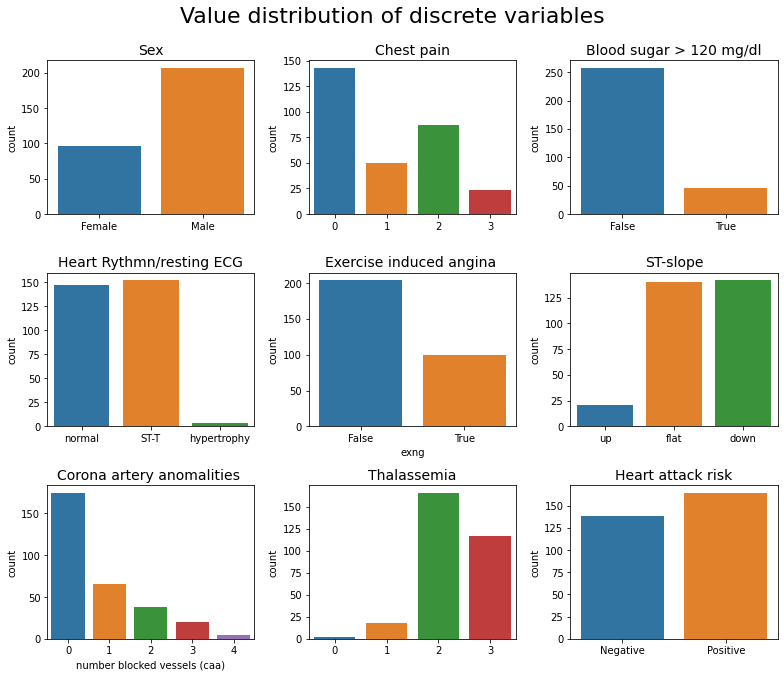

In [ ]:
import matplotlib.pyplot as plt

# Vars: sex, chest_pain, fasting_BS, resting_ECG, exng, ST_slope, caa, thall,HA_pred 

fig, plot = plt.subplots(3,3, figsize = (11,9))

fig.suptitle('Value distribution of discrete variables', fontsize = 22, y = 1.04)


plot[0,0] = sns.countplot(data = df,
                        x = 'sex',
                        ax = plot[0,0])
plot[0,0].set_title('Sex',fontsize = 14)
plot[0,0].set_xticklabels(['Female','Male'])
plot[0,0].set_xlabel('')

plot[0,1] = sns.countplot(data = df,
                      x = 'chest_pain',
                      ax = plot[0,1])
# (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
#plot[0,1].set_xticklabels(['angina','atypical angina','non_anginal','asymptomatic'])
plot[0,1].set_title('Chest pain',fontsize = 14)
plot[0,1].set_xlabel('')

plot[0,2] = sns.countplot(data = df,
                        x = 'fasting_BS',
                        ax = plot[0,2])
plot[0,2].set_title('Blood sugar > 120 mg/dl',fontsize = 14)
plot[0,2].set_xticklabels(['False','True'])
plot[0,2].set_xlabel('')

plot[1,0] = sns.countplot(data = df,
                       x = 'resting_ECG',
                       ax = plot[1,0])
plot[1,0].set_title('Heart Rythmn/resting ECG',fontsize = 14)
#0 = normal; 1 = having ST-T; 2 = hypertrophy
plot[1,0].set_xticklabels(['normal','ST-T','hypertrophy'])
plot[1,0].set_xlabel('')


plot[1,1] = sns.countplot(data = df,
                       x = 'exng',
                       ax = plot[1,1])
plot[1,1].set_title('Exercise induced angina ',fontsize = 14)
plot[1,1].set_xticklabels(['False','True'])

plot[1,2] = sns.countplot(data = df,
                       x = 'ST_slope',
                       ax = plot[1,2])
plot[1,2].set_title('ST-slope',fontsize = 14)
plot[1,2].set_xticklabels(['up','flat','down'])
plot[1,2].set_xlabel('')

plot[2,0] = sns.countplot(data = df,
                      x = 'caa',
                      ax = plot[2,0],
                      )
plot[2,0].set_xlabel('number blocked vessels (caa)')
plot[2,0].set_title('Corona artery anomalities ',fontsize = 14)

plot[2,1] = sns.countplot(data = df,
                       x = 'thall',
                       ax = plot[2,1])
plot[2,1].set_title('Thalassemia',fontsize = 14)
plot[2,1].set_xlabel('') # Missing description

plot[2,2] = sns.countplot(data = df,
                          x = 'HA_pred',
                          ax = plot[2,2])
plot[2,2].set_title('Heart attack risk',fontsize = 14);
plot[2,2].set_xticklabels(['Negative','Positive'])
plot[2,2].set_xlabel('')


fig.tight_layout()

# Include some comments 

''

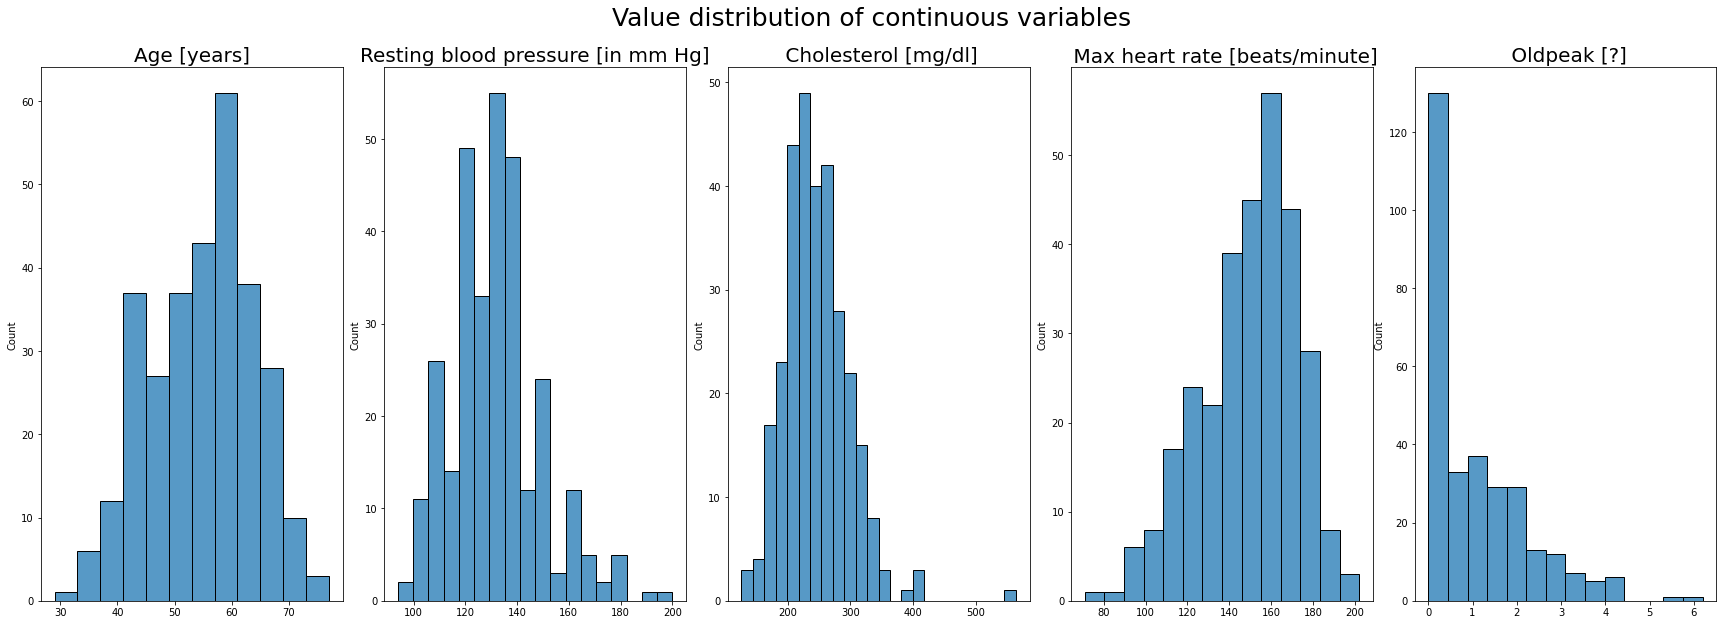

In [ ]:
import matplotlib.pyplot as plt

fig, plot = plt.subplots(1,5, figsize = (24,8))

fig.suptitle('Value distribution of continuous variables',fontsize = 25,y=1.08)
fig.tight_layout()

plot[0] = sns.histplot(data = df,
                        x = 'age',
                        ax = plot[0],
                        bins = 'auto',
                       )
plot[0].set_title('Age [years]',fontsize = 20)

plot[1] = sns.histplot(data = df,
                       x = 'resting_BP',
                       bins = 'auto',
                       ax = plot[1])
plot[1].set_title('Resting blood pressure [in mm Hg]',fontsize = 20)

plot[2] = sns.histplot(data = df,
                      x = 'cholesterol',
                      ax = plot[2],
                      bins = 'auto'
                      )
plot[2].set_title(' Cholesterol [mg/dl]',fontsize = 20)

plot[3] = sns.histplot(data=df,
                       x = 'max_heart_rate',
                       bins = 'auto',
                       kde = False,
                       ax = plot[3])
plot[3].set_title(' Max heart rate [beats/minute]',fontsize = 20)

plot[4] = sns.histplot(data = df,
                       x = 'oldpeak',
                       bins = 'auto',
                       ax = plot[4],
                       kde = False,
                       )
plot[4].set_title(' Oldpeak [?]',fontsize = 20)
plot[0].set_xlabel('')
plot[1].set_xlabel('')
plot[2].set_xlabel('')
plot[3].set_xlabel('')
plot[4].set_xlabel('')
;

Here is yet another visulization of the varibale *age* 

In [ ]:
 fig, plot = plt.subplots(1,2,figsize=(12,8))
 
 sns.kdeplot(data=df,x='age',shade=True,shade_lowest=True,cumulative=False,ax=plot[0])
 sns.kdeplot(data=df,x='age',shade=True,shade_lowest=True,cumulative=True,color='orange',ax=plot[1])

 plot[0].set(title='Density distribution')
 plot[1].set(title='Density distribution accumulated')
 ;

# Data Cleaning

In [ ]:
# Make outlier detection and deletion

# Hypothesis testing

Examine the distribution among *age* of the various types of *resting_ECG* data (electroenzephalogram)

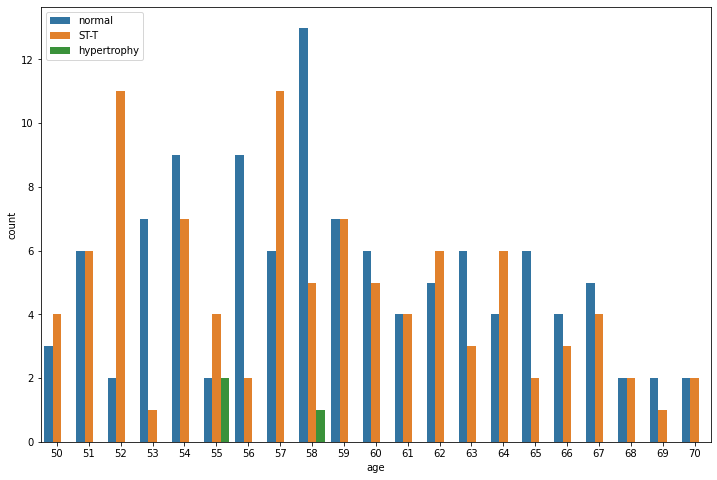

In [ ]:
df_filtered = df.query('age >= 50 and age <= 70')

fig, plot = plt.subplots(figsize=(12,8))

plot = sns.countplot(data=df_filtered,
              x='age',
              hue='resting_ECG',
              dodge=True,
              )
plot.legend(labels =['normal', 'ST-T','hypertrophy']);


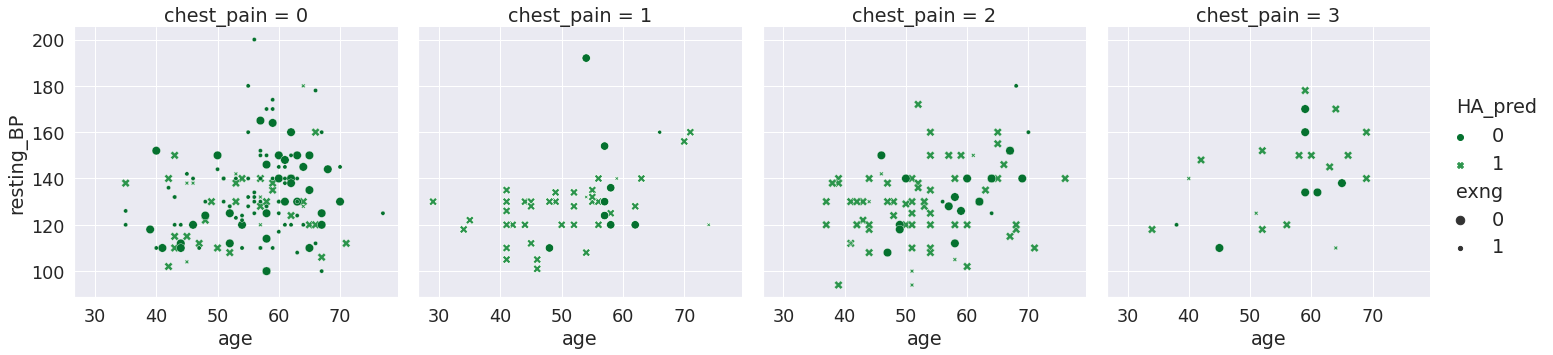

In [ ]:
sns.set_theme(palette='Greens_r',font_scale=1.6)

sns.relplot(data = df,
            col = 'chest_pain',
            hue = 'HA_pred',
            style = 'HA_pred',
            x = 'age',
            y = 'resting_BP',
            size = 'exng'
            ) ;

In [ ]:
# Split Df into groups by feature
def split(df, group):
     gb = df.groupby(group)
     return [gb.get_group(x) for x in gb.groups]

splittable = split(df,'chest_pain')

In [ ]:
import numpy as np

# Count feature occurence of condition
def count_counts(df, condition):
  SUM = 0
  df=df.query(condition)
  SUM= np.sum([SUM, df.shape[0]])
  return(SUM)

neg = []
pos = []
for s in splittable:
  neg.append((count_counts(s, condition='HA_pred == 0')))
  pos.append((count_counts(s, condition='HA_pred == 1')))

frame = pd.DataFrame(data=(neg,pos)).transpose()
frame[2] = frame[0] + frame[1]
frame.rename(axis=1,mapper={0:'neg',1:'pos',2:'total'},inplace=True)
frame['%'] = round(frame['pos']/frame['total'],2)
frame

,neg,pos,total,%
0,104,39,143,0.27
1,9,41,50,0.82
2,18,69,87,0.79
3,7,16,23,0.70


Write some stuff like an analysis etc.

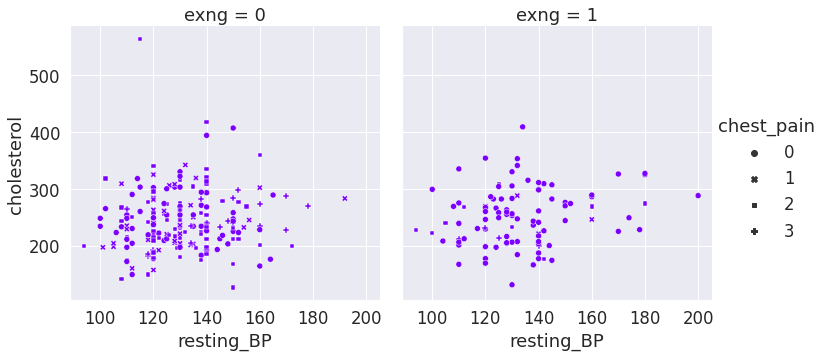

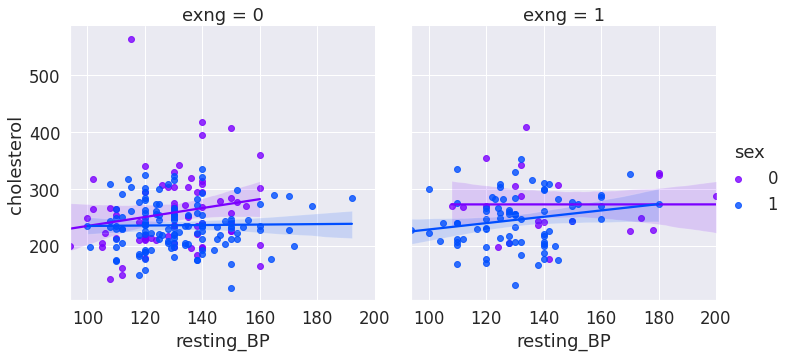

In [ ]:
sns.set_theme(font_scale=1.5,palette= 'gist_rainbow_r')

sns.relplot(data = df, 
            x ='resting_BP',
            y = 'cholesterol', 
            col= 'exng',
            #hue= 'chest_pain',
            style='chest_pain')

sns.lmplot(data= df,
           x = 'resting_BP',
           y = 'cholesterol',
           col = 'exng',
           hue = 'sex',
           )

In [ ]:
# [0] = exng =0
splittable[0]['exng'].value_counts()

0    204
Name: exng, dtype: int64

In [ ]:
splittable = split(df, 'exng')
groups= []
for group in splittable:
  groups.append(count_counts(group,'chest_pain == 0'))
  groups.append(count_counts(group,'chest_pain == 1'))
  groups.append(count_counts(group,'chest_pain == 2'))
  groups.append(count_counts(group,'chest_pain == 3'))


groups.insert(4,sum([groups[0],groups[1],groups[2],groups[3]]))
groups.insert(9,sum([groups[5],groups[6],groups[7],groups[8]]))
groups

# Create DataFrame 
frame = pd.DataFrame(data=(groups[0:5],groups[5::]))
frame.rename(axis=1, mapper = {0:'cp1',1:'cp2',2:'cp3',3:'cp4',4:'total'},inplace=True)
frame

,cp1,cp2,cp3,cp4,total
0,63,46,76,19,204
1,80,4,11,4,99


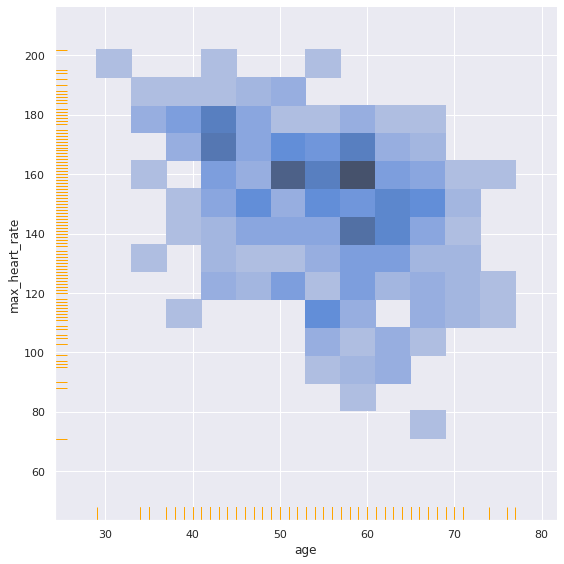

In [ ]:
sns.displot(data = df, 
            x = 'age',
            y = 'max_heart_rate',
            bins = 'auto',
            rug = True,
            rug_kws = {'color':'orange'},
            height = 8,
            kind = 'hist' # kde, ecdf, default:hist
            );

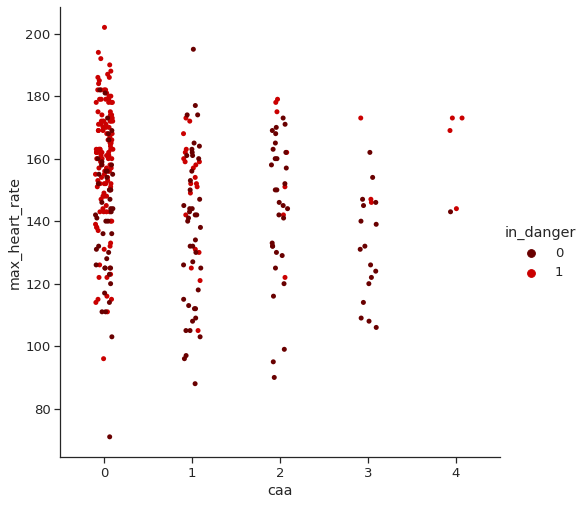

In [ ]:
sns.set_theme(palette='hot', font_scale = 1.2,font = 'sans')

sns.set_style("ticks", {"xtick.major.size": 12, "ytick.major.size": 12})

sns.catplot(data =df,
            x = 'caa',
            y = 'max_heart_rate',
            hue = 'in_danger',
            height = 7);

In [ ]:
df_split = split(df,'caa')
caa_data = []
for i,v in enumerate(df_split):
  caa_data.append(count_counts(df_split[i],'HA_pred == 0'))
  caa_data.append(count_counts(df_split[i],'HA_pred == 1'))

HA_neg = caa_data[0::2]
HA_pos = caa_data[1::2]
HA_neg.append(sum(HA_neg))
HA_pos.append(sum(HA_pos))
frame = pd.DataFrame(data=(HA_neg,HA_pos))
frame.rename(axis=1,inplace=True,mapper={0:'type0',1:'type1',2:'type2',3:'type3',4:'type4',5:'total'})
frame.rename(axis=0,inplace=True,mapper={0:'ha_neg',1:'ha_pos'})
frame

,type0,type1,type2,type3,type4,total
ha_neg,45,44,31,17,1,138
ha_pos,130,21,7,3,4,165


In [ ]:
HA_neg_new = [round(x/303,3) for x in HA_neg]
HA_pos_new = [round(x/303,3) for x in HA_pos]
frame = pd.DataFrame(data=(HA_neg_new,HA_pos_new))
frame.rename(axis=1,inplace=True,mapper={0:'type0',1:'type1',2:'type2',3:'type3',4:'type4',5:'total'})
frame.rename(axis=0,inplace=True,mapper={0:'ha_neg',1:'ha_pos'})
frame['total']=[138,165]
frame

,type0,type1,type2,type3,type4,total
ha_neg,0.149,0.145,0.102,0.056,0.003,138
ha_pos,0.429,0.069,0.023,0.010,0.013,165


In [ ]:
df['HA_pred'].value_counts()

1    165
0    138
Name: HA_pred, dtype: int64

In [ ]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,chol,fast_blood_sugar,restecg,max_heart_rate,sports_dangered,oldpeak,slp,caa,thall,in_danger
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


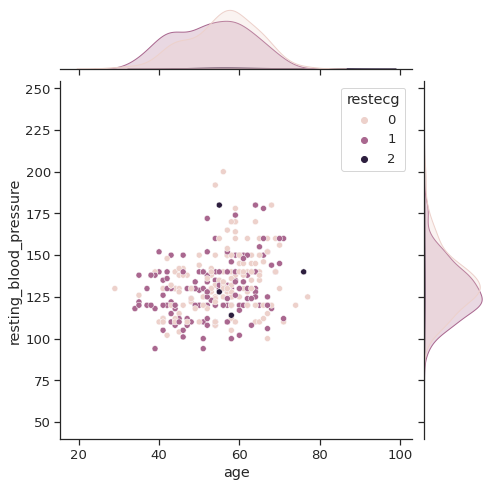

In [ ]:
sns.set_theme(font_scale = 1.2,font = 'sans')

sns.set_style("ticks", {"xtick.major.size": 12, "ytick.major.size": 12})

sns.jointplot(data=df,
              x = 'age',
              y = 'resting_blood_pressure',
              height = 7,
              hue = 'restecg',
              )

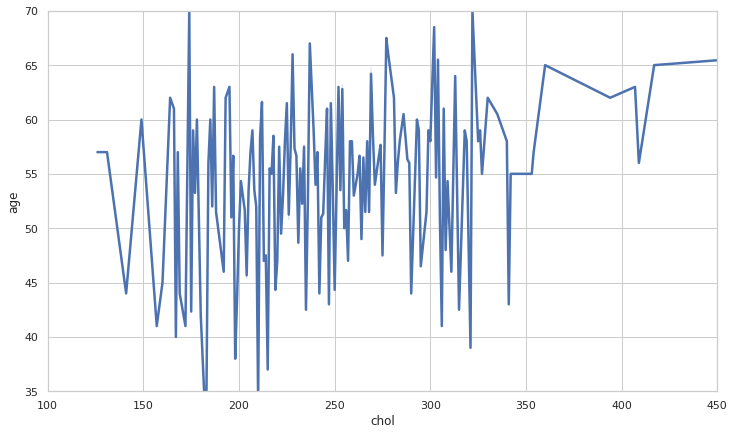

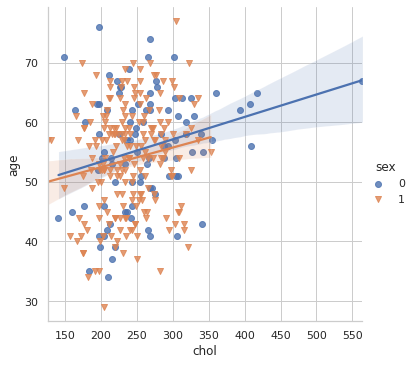

In [ ]:
fix,plot = plt.subplots(figsize=(12,7))


sns.lineplot(data=df,
             x = 'chol',
             y = 'age',
             palette = 'tab10',
             linewidth = 2.5,
             ax = plot,
             ci = 5,
             )

sns.set_theme(style='whitegrid')


plot.axis([100,450,35,70])



plot = sns.lmplot(data=df,
             x = 'chol',
             y = 'age',
             #palette = 'tab12',
             hue = 'sex',
             markers = ['o','v'],
             #scatter = False
           )


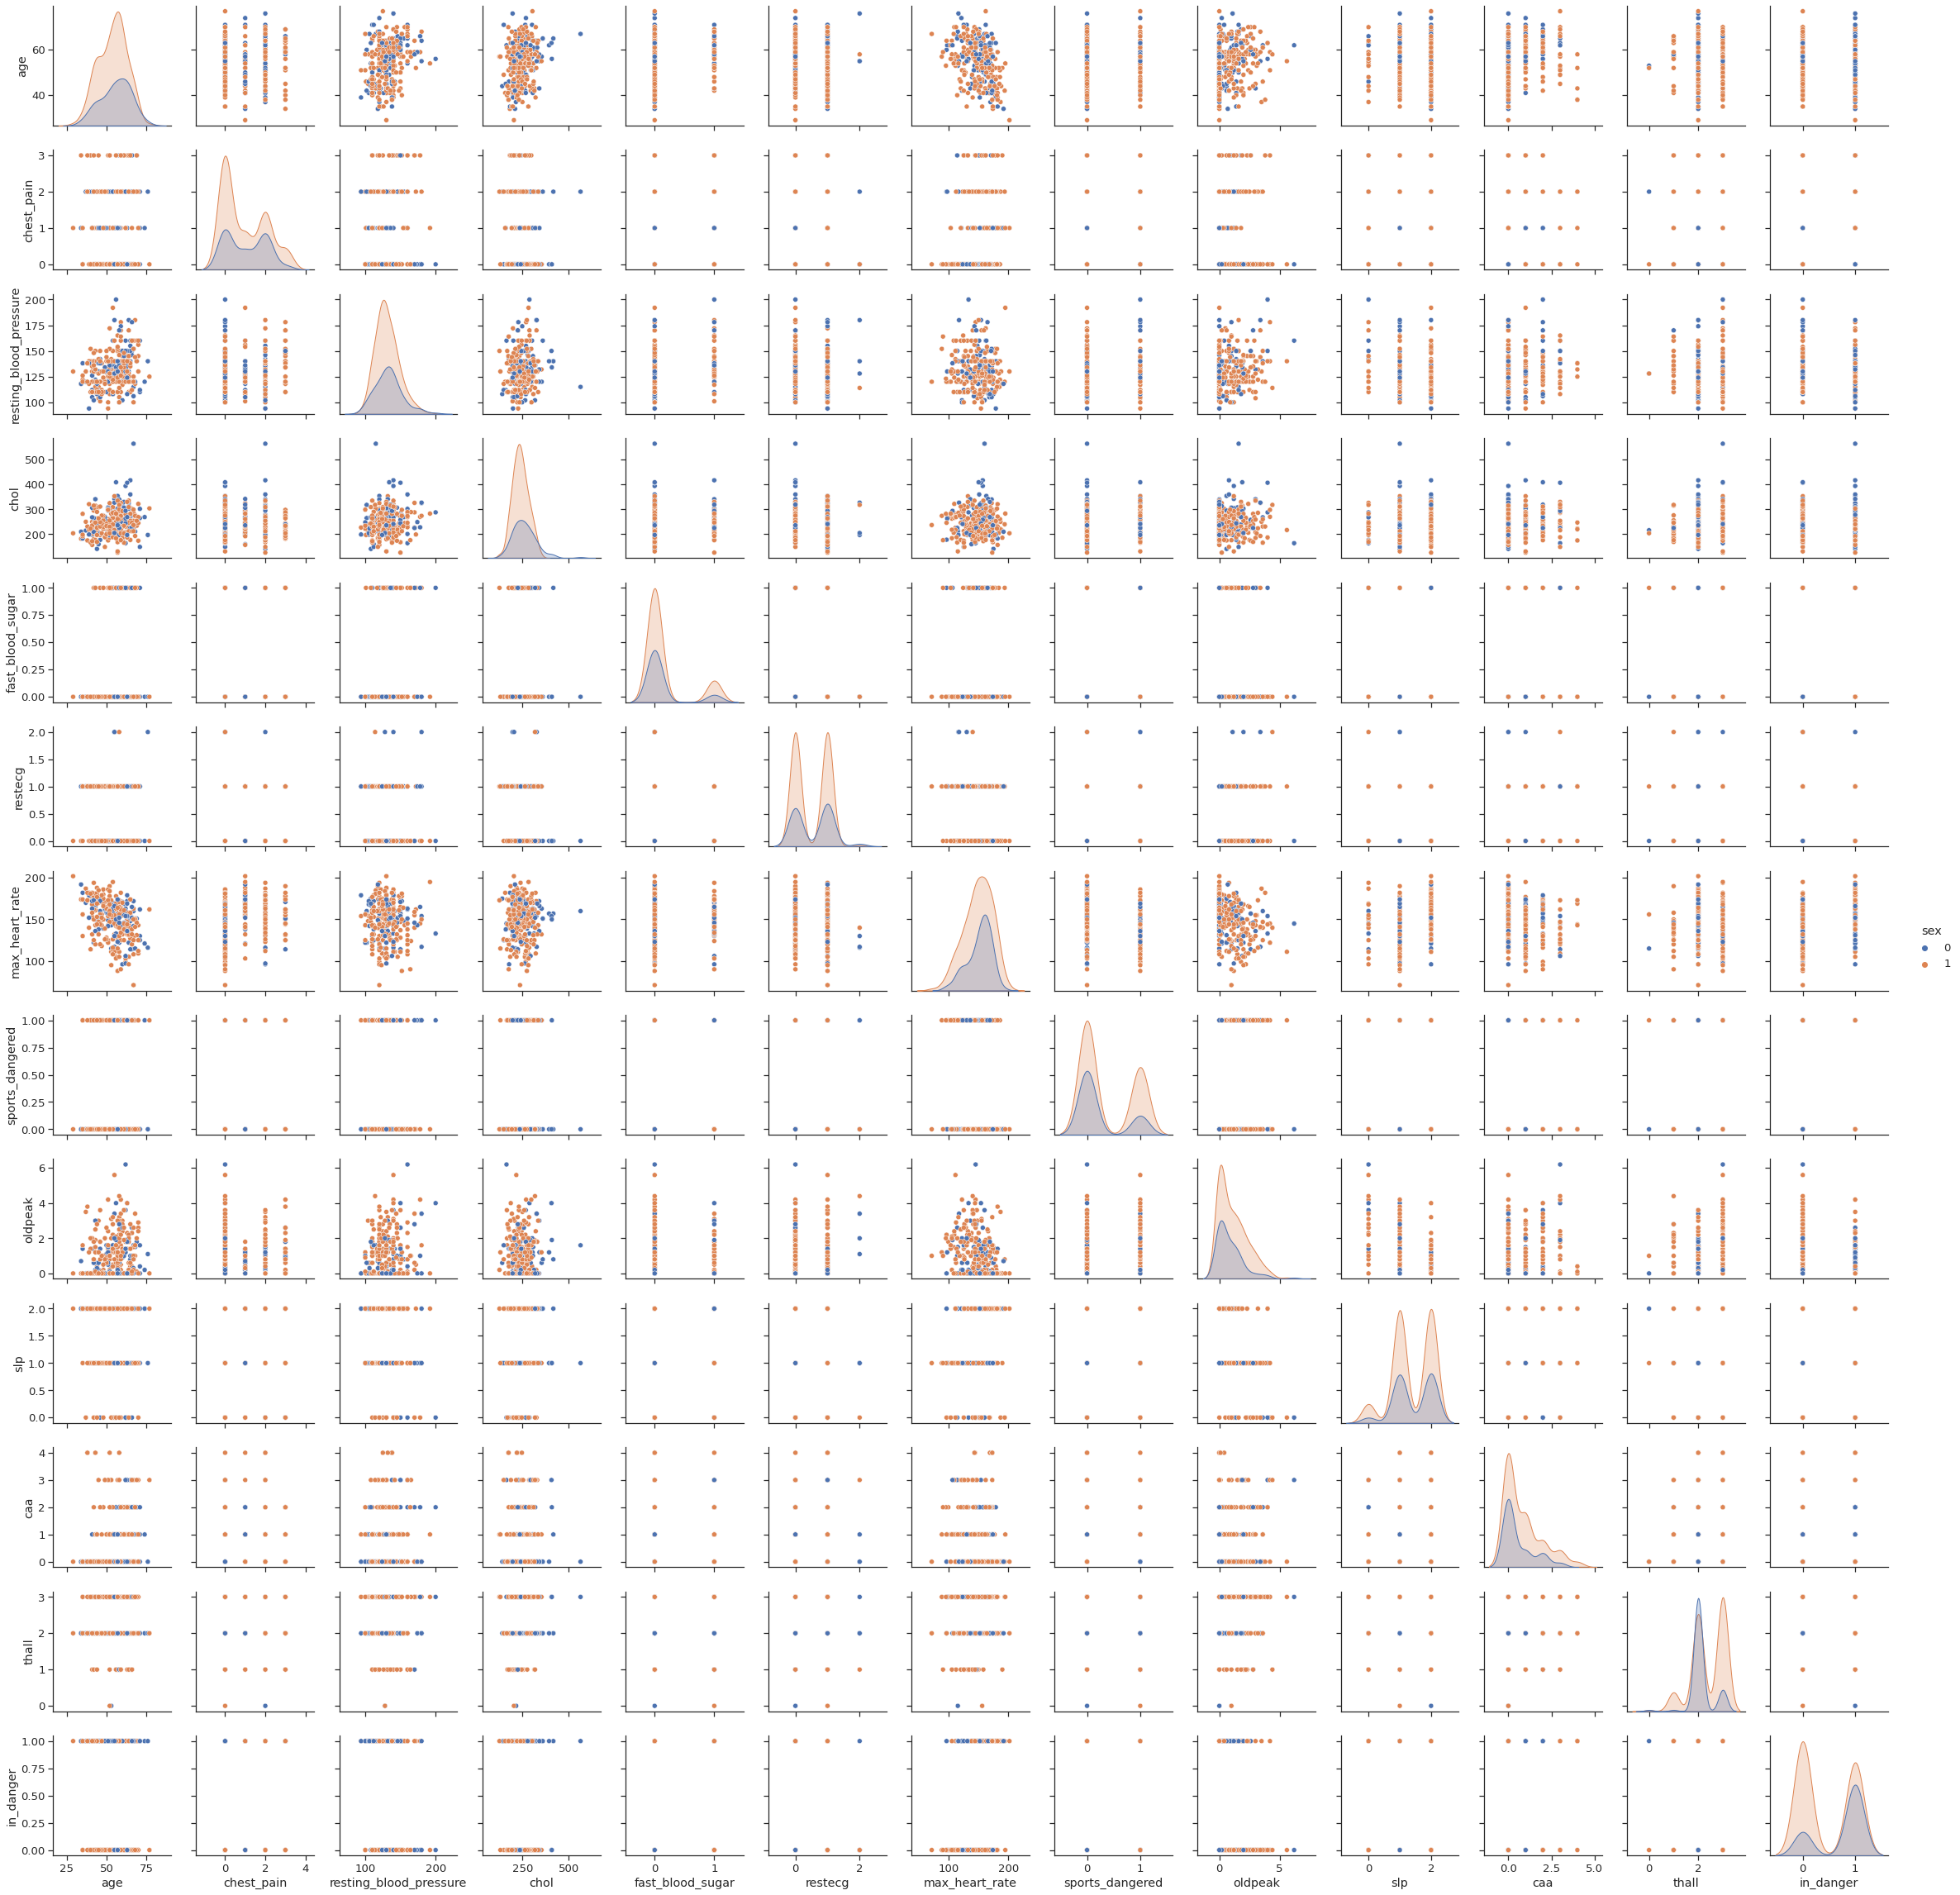

In [ ]:
sns.pairplot(data=df,
             hue='sex')

# Discussion

Research hypothesis question in respect to something plotted